In [9]:
#Building a regression model to predict solar energy using weather and environmental conditions

In [10]:
import pandas as pd
import numpy as np

# Visualization (for later EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
#LOAD THE DATASET

In [12]:
df = pd.read_csv("data.xlsx")

In [13]:
#DATA PREPROCESSING

In [14]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [15]:
df.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [16]:
df.shape

(2920, 10)

In [17]:
#MISSING VALUES
print(df.isnull().sum())

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64


In [18]:
df["average-wind-speed-(period)"] = df["average-wind-speed-(period)"].fillna(
    df["average-wind-speed-(period)"].mean()
)
#It replaces missing values in average-wind-speed-(period) with that column’s mean.

In [19]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [20]:
#DUPLICATES
df.duplicated().sum()

np.int64(0)

In [21]:
print("Duplicated rows:", df.duplicated().sum())

Duplicated rows: 0


In [22]:
#TRAIN TEST SPLIT ...and afterwards we'll perform EDA on training data
from sklearn.model_selection import train_test_split

X = df.drop("power-generated", axis=1)    #axis=1 (Drop Column)
y = df["power-generated"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [23]:
print(X_train)

      distance-to-solar-noon  temperature  wind-direction  wind-speed  \
2651                0.160000           65              27        13.6   
1709                0.298292           54              27        25.1   
869                 0.511344           47              20         8.7   
2355                0.148816           67              29        10.7   
2915                0.166453           63              27        13.9   
...                      ...          ...             ...         ...   
1638                0.546685           52              27        10.7   
1095                1.084602           56              13         3.2   
1130                0.436455           55              13         1.5   
1294                0.715856           48              29        16.2   
860                 0.198953           43              29         8.4   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
2651          1        10.0        68                

In [24]:
print(y_train)

2651    10750
1709    18575
869      3407
2355    29010
2915     6995
        ...  
1638      445
1095        0
1130      207
1294        0
860     22524
Name: power-generated, Length: 2336, dtype: int64


In [25]:
#EDA ON TRAINING DATA
#Combine Training Data for EDA
train_df = X_train.copy()
train_df["power-generated"] = y_train

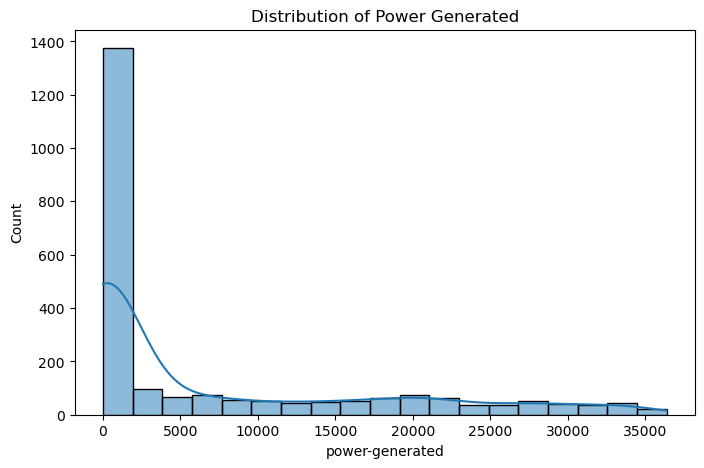

In [26]:
#Target Variable Distribution
plt.figure(figsize=(8,5))
sns.histplot(train_df["power-generated"],kde = True)
plt.title("Distribution of Power Generated")
plt.show()

In [27]:
#SUMMARY
train_df["power-generated"].describe()

count     2336.000000
mean      7003.485445
std      10324.407377
min          0.000000
25%          0.000000
50%        397.000000
75%      12818.500000
max      36368.000000
Name: power-generated, dtype: float64

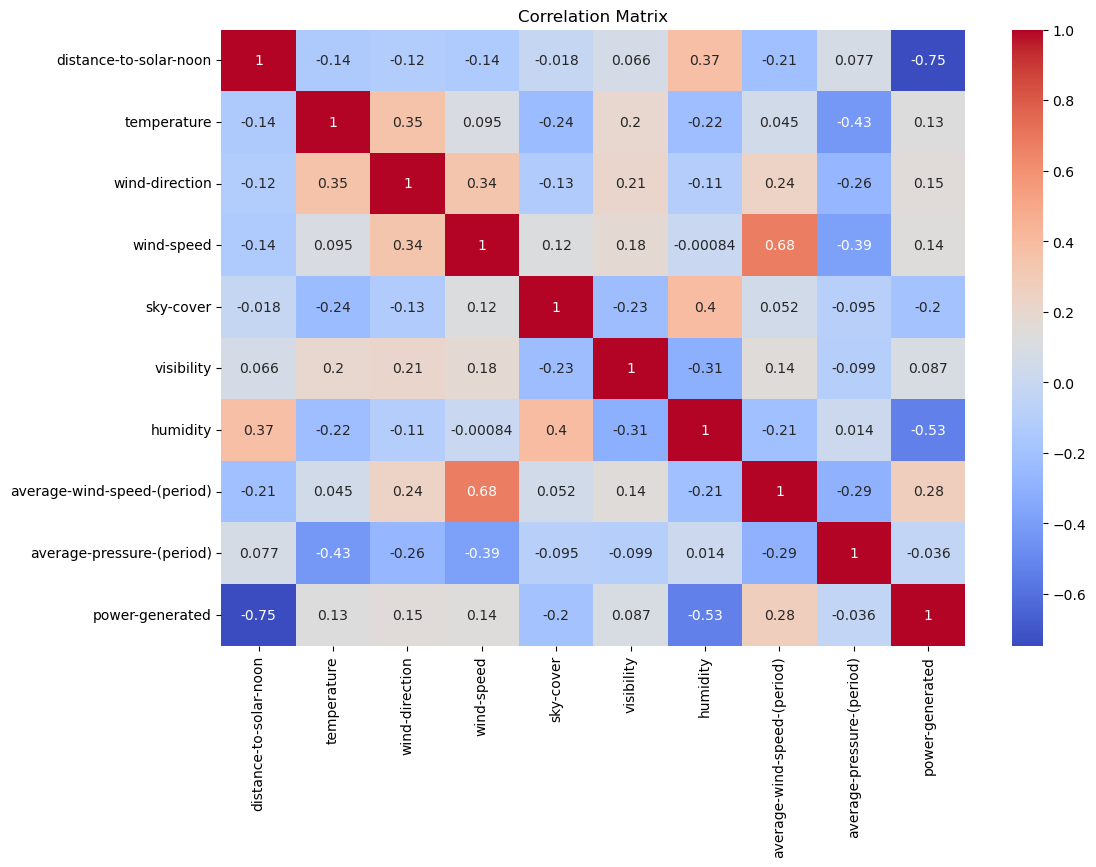

In [28]:
#Coorelation Matrix 
#This helps identify strong predictors and multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

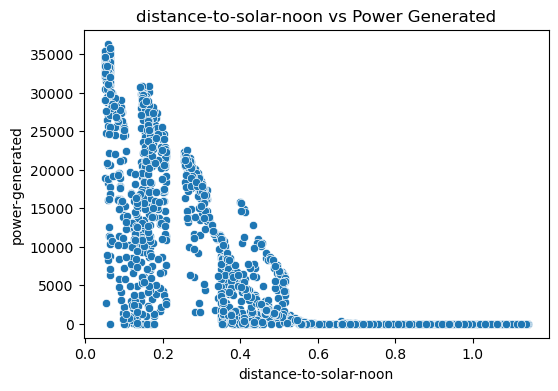

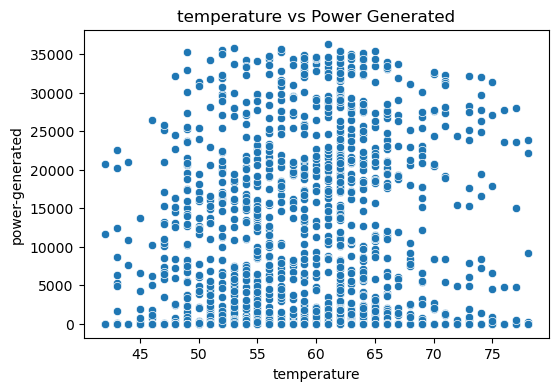

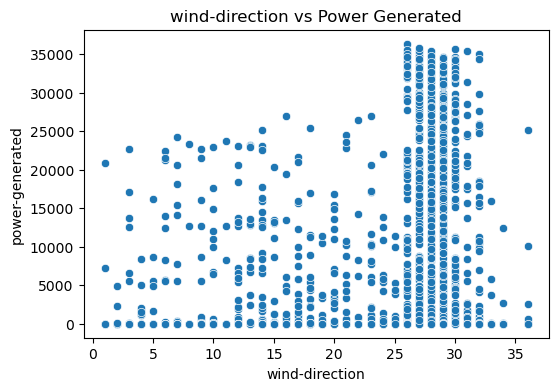

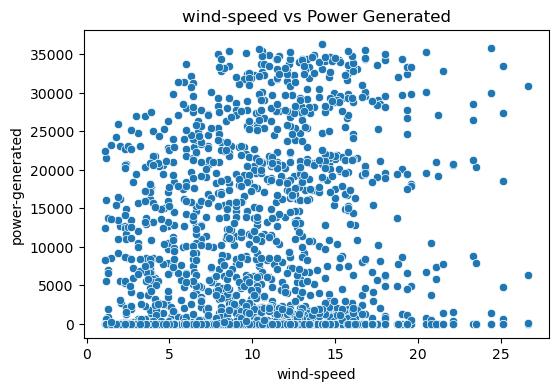

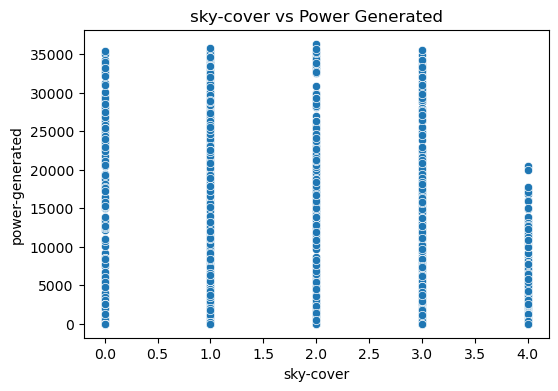

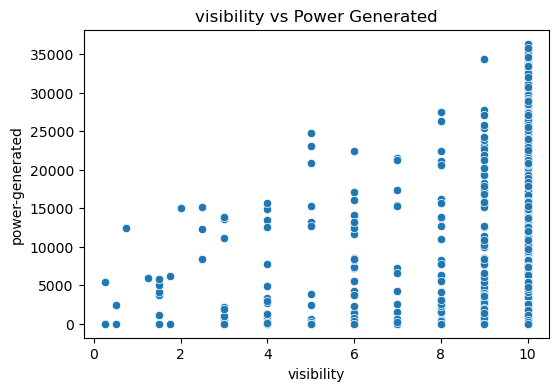

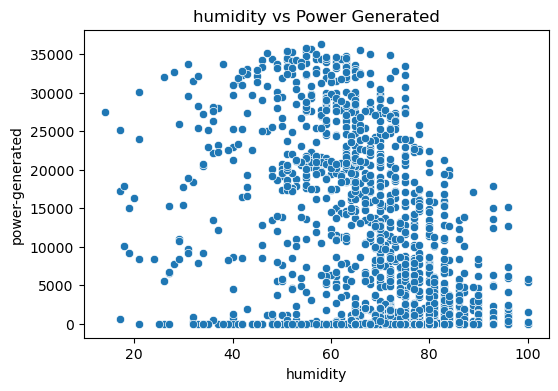

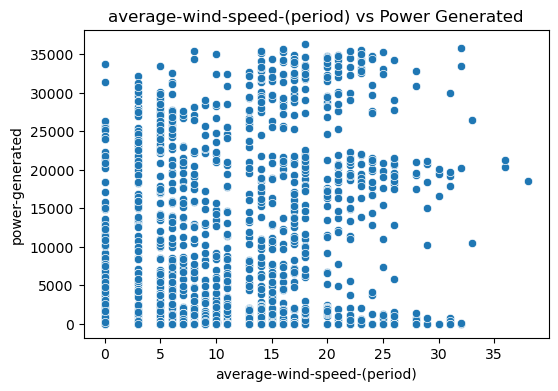

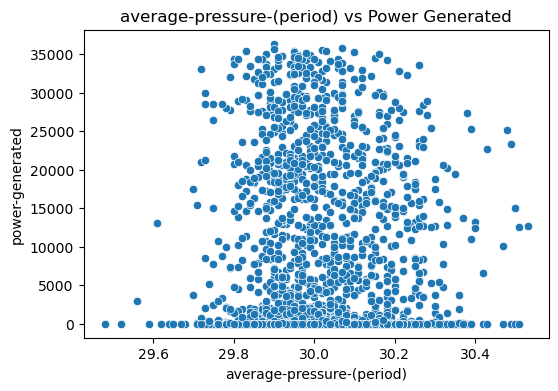

In [29]:
#Feature vs Target Relationships
for col in X_train.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=train_df[col], y=train_df["power-generated"])
    plt.title(f"{col} vs Power Generated")
    plt.show()

In [30]:
#Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(X_train.shape[1])]

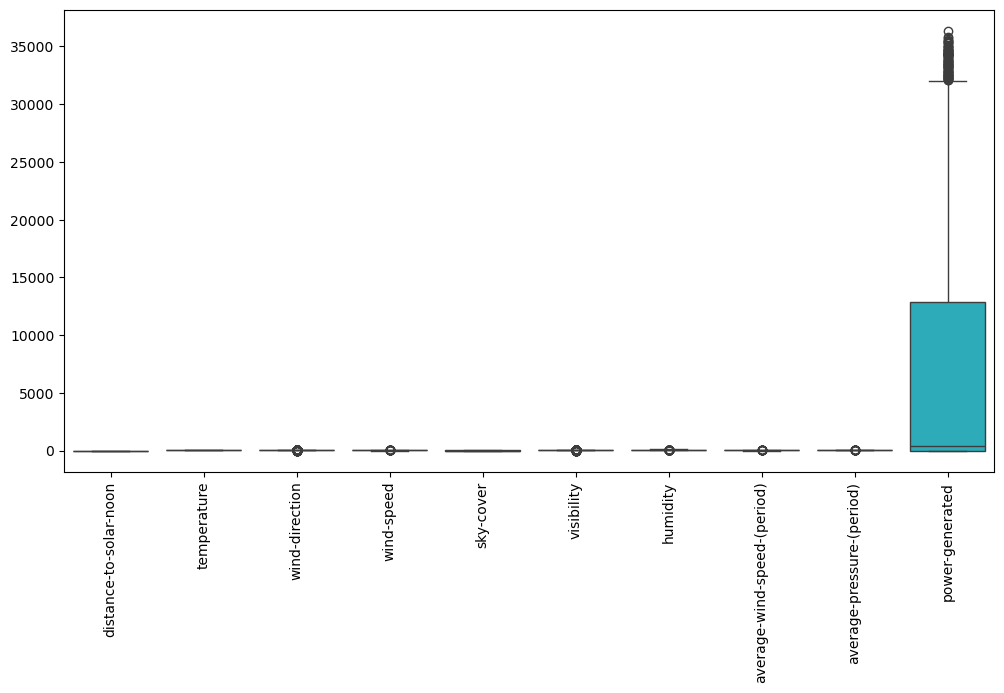

In [31]:
#Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df)
plt.xticks(rotation=90)
plt.show()

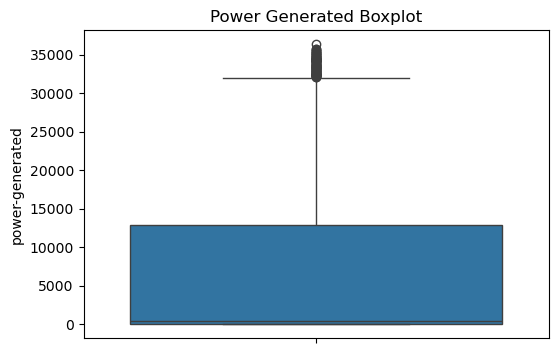

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(y=train_df["power-generated"])
plt.title("Power Generated Boxplot")
plt.show()

<Axes: xlabel='power-generated', ylabel='Count'>

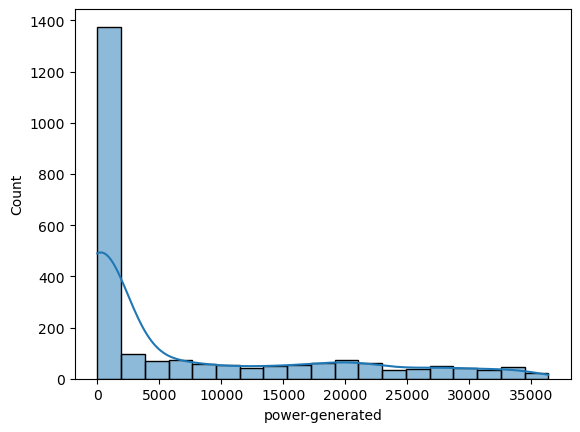

In [33]:
sns.histplot(train_df["power-generated"], kde=True)


In [34]:
#Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
print(X_train_scaled[:5])

[[-1.14325278  0.96537221  0.30478885  0.73499635 -0.72225762  0.33056027
  -0.38401522  0.53048194 -0.97544427]
 [-0.68232956 -0.64301813  0.30478885  3.1331189  -0.01424511  0.33056027
  -0.65237496  3.83618008 -0.90507033]
 [ 0.02776829 -1.66653926 -0.70003116 -0.28681239  1.40177989  0.33056027
  -0.31692528  0.11726967  0.85427818]
 [-1.18052803  1.25780681  0.59188028  0.13025241 -1.43027012  0.33056027
  -0.24983534 -0.70915487 -1.32731397]
 [-1.1217442   0.6729376   0.30478885  0.79755607  1.40177989  0.33056027
   0.08561434 -0.02046775 -0.62357457]]


In [36]:
print(X_train_scaled.mean())
print(X_train_scaled.std())

-1.4923797019752009e-15
1.0


In [37]:
#MODEL  BUILDING
from sklearn.linear_model import LinearRegression
lr = LinearRegression()                             #ModelObject

In [38]:
#Training the model by adjusting its internal parameters to training data
lr.fit(X_train_scaled, y_train)  

LinearRegression()

In [39]:
#Make prediction using trained model.
y_pred = lr.predict(X_test_scaled)   

In [40]:
print(y_pred)

[ 1.68137976e+04  1.00469615e+04  5.11853911e+03  6.93388530e+03
  7.69402411e+03  2.06730565e+04  3.29646942e+02 -2.49915714e+03
  2.46810511e+03  3.06316331e+03  7.10278676e+03 -1.55367141e+03
  1.76672161e+04  1.91054350e+04  9.97684031e+03 -8.36051185e+03
 -9.71811125e+03  7.55915366e+03  7.23680761e+03  6.20174789e+03
  1.52305105e+04 -8.89952536e+03  1.25684310e+04  5.61989238e+03
  1.49804458e+04  4.23538749e+03  1.64883574e+04  3.47052880e+03
  1.86796786e+04  1.82055459e+04  1.75969814e+04  2.34262942e+04
  1.40084008e+04  1.79400610e+03 -4.90641856e+02  1.42926707e+04
 -1.02626439e+03  1.06470300e+04  2.37263797e+04 -6.94816139e+03
  1.27707596e+04  5.80120747e+02  1.70734923e+04 -9.55832264e+02
  7.95593971e+03  1.47561211e+04  1.06451224e+04  2.01707851e+04
  1.48711823e+04 -9.20976829e+02  3.16464298e+03  1.53312379e+04
  1.64972204e+04 -7.41901204e+03  7.89445570e+03  3.60134858e+03
  9.74019522e+03  1.05962066e+04 -6.41082737e+03  7.34179228e+03
  2.63856555e+04  1.03358

In [41]:
#Evaluate the Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("Linear R2 Score:", r2)

MAE: 4981.201479686538
RMSE: 6284.518798127551
Linear R2 Score: 0.6250592396092092


In [42]:
#DECISION TREE REGRESSOR

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
 #Create Model
dt = DecisionTreeRegressor(random_state=42)    

In [45]:
#Train model
#Trees doesn't require scaling

dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
#Make Predictions
y_pred_dt = dt.predict(X_test)

In [47]:
#Evaluate Model

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree RMSE: 4439.850798508177
Decision Tree R2: 0.8128648591958793


In [48]:
#Training Performance
y_train_pred_dt = dt.predict(X_train)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
r2_train_dt = r2_score(y_train, y_train_pred_dt)

print("Training R2:", r2_train_dt)
print("Testing R2:", r2_dt)

Training R2: 1.0
Testing R2: 0.8128648591958793


In [49]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

In [50]:
#Create Model
rf = RandomForestRegressor(random_state=42)

In [51]:
#Train Model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
#make Prediction
y_pred_rf = rf.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest R2:", r2_rf)

Random Forest R2: 0.8897753670719873


In [60]:
#Training Performance
y_train_pred_rf = rf.predict(X_train)

rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Training R2:", r2_train_rf)
print("Testing R2:", r2_rf)

Training R2: 0.9882988690710424
Testing R2: 0.8897753670719873


In [54]:
#Comparing all three models 
print("Linear R2 Score:", r2)    #Linear regression
print("Decision Tree R2:", r2_dt)   #Decision Tree
print("Random Forest R2:", r2_rf)   #Random Forest

Linear R2 Score: 0.6250592396092092
Decision Tree R2: 0.8128648591958793
Random Forest R2: 0.8897753670719873


In [ ]:
#Cross Validation
#Now R2 Score=0.88 is based on one train-test-split so using 5 fold cross validation technique we'll check if we split multiple and average the results then what's the catch

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

print("CV Scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())
#If the reults of multiple sets are closer to each then it is stable.
# This ensures that your model is stable and not dependent on one split.


CV Scores: [0.80811175 0.74926875 0.82743916 0.90911554 0.92633327]
Average CV R2: 0.8440536952484508


In [59]:
#Feature Importance
importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance",ascending=False)

print(importance)

                       Feature  Importance
0       distance-to-solar-noon    0.827671
4                    sky-cover    0.083785
6                     humidity    0.023636
3                   wind-speed    0.017372
2               wind-direction    0.015206
1                  temperature    0.011007
7  average-wind-speed-(period)    0.010168
8    average-pressure-(period)    0.009562
5                   visibility    0.001594


In [62]:
final_model = RandomForestRegressor()
final_model.fit(X_train, y_train)

RandomForestRegressor()

In [64]:
import joblib
joblib.dump(final_model, "random_forest_model.pkl")

['random_forest_model.pkl']